**MELI DATA CHALLENGE 2019 - RESULTS**
=====================================
**Description:** 

This notebook is intended to analyze the results of the models obtained, in order to assess the performance of the solution developed as well as to identify next steps to improve it.

> **NOTE:** these results were obtained with a sample of 1M rows, due to lack of time to run the last changes with all the 20M rows. Some differences can be expected with the results of the actual competition.

In [1]:
import json
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from melidatachall19.utils import load_profile

In [2]:
# Util functions 

def get_json_results(profile):
    """Load all results from JSON files"""
    results = dict()
    folder = os.path.abspath(".")

    for l, items in profile["paths"]["results"].items():
        results[l] = dict()
        for k, path in items.items():
            with open(path, "r") as f:
                results[l][k] = json.load(f)
                
    return results

def get_df_results(results, language="es"):
    """Get a pd.DataFrame with results for model of 'language'"""
    data = dict()
    
    for d, items in results.items():
        if d not in ["train", "valid", "test"]:
            continue
            
        if "dataset" not in data:
            data["dataset"] = [d]
        else:
            data["dataset"].append(d)
        for k, v in items[language].items():
            if k not in data:
                data[k] = [v]
            else:
                data[k].append(v)

    return pd.DataFrame(data)

In [3]:
profile = load_profile("../profiles/profile_sampled_data.yml", root_path="..")
print("Profile used for the execution:")
profile

Profile used for the execution:


{'paths': {'data': '../data',
  'raw': '../data/train.csv',
  'train': {'es': '../data/train_es.parquet',
   'pt': '../data/train_pt.parquet'},
  'test': {'es': '../data/test_es.parquet', 'pt': '../data/test_pt.parquet'},
  'model': {'es': '../models/model_es.h5', 'pt': '../models/model_pt.h5'},
  'vectorizer': {'es': '../models/vectorizer_es.pkl',
   'pt': '../models/vectorizer_pt.pkl'},
  'label_encoder': {'es': '../models/label_encoder_es.pkl',
   'pt': '../models/label_encoder_pt.pkl'},
  'results': {'train': {'es': '../models/results/train_es.json',
    'pt': '../models/results/train_pt.json'},
   'valid': {'es': '../models/results/valid_es.json',
    'pt': '../models/results/valid_pt.json'},
   'test': {'es': '../models/results/test_es.json',
    'pt': '../models/results/test_pt.json'},
   'fit_history': {'es': '../models/results/fit_history_es.json',
    'pt': '../models/results/fit_history_pt.json'}}},
 'preprocess': {'nrows': 1000000, 'test_size': 0.3, 'min_count_category': 20

In [4]:
all_results = get_json_results(profile)
print("JSON with results obtained")
all_results

JSON with results obtained


{'train': {'es': {'accuracy': 0.8962935123188731,
   'balanced_accuracy': 0.8438454303401595,
   'f1_micro': 0.8962935123188731,
   'loss': 0.520282506942749},
  'pt': {'accuracy': 0.881917687191695,
   'balanced_accuracy': 0.8463125174955868,
   'f1_micro': 0.881917687191695,
   'loss': 0.5792341232299805}},
 'valid': {'es': {'accuracy': 0.7961280729012763,
   'balanced_accuracy': 0.7149549339359018,
   'f1_micro': 0.7961280729012763,
   'loss': 1.2358505725860596},
  'pt': {'accuracy': 0.7851839126534196,
   'balanced_accuracy': 0.7308242441676795,
   'f1_micro': 0.7851839126534196,
   'loss': 1.2547917366027832}},
 'test': {'es': {'accuracy': 0.7944418496029892,
   'balanced_accuracy': 0.7151979057320142,
   'f1_micro': 0.7944418496029892,
   'loss': 1.2455775737762451},
  'pt': {'accuracy': 0.7868294996759819,
   'balanced_accuracy': 0.7311824410133556,
   'f1_micro': 0.7868294996759819,
   'loss': 1.2606128454208374}},
 'fit_history': {'es': {'loss': [4.833012412421,
    1.6060432

### > Check history of modeling

Let's see how the model was fitted during the training session to identify possible overfitting / underfitting on the process. 

If the metric has a prefix "val" it corresponds to the validation set, otherwise to the train set.

In [5]:
fit_history_es = pd.DataFrame(all_results["fit_history"]["es"])
fit_history_pt = pd.DataFrame(all_results["fit_history"]["pt"])

#### Spanish model

In [6]:
fit_history_es

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy,lr
0,4.833012,0.322911,1.480612,0.746612,0.001
1,1.606043,0.704709,1.262999,0.782977,0.001
2,1.243398,0.757599,1.233648,0.789387,0.001
3,1.078111,0.779912,1.227098,0.795087,0.001
4,0.985611,0.796798,1.235812,0.796188,0.001


✔ Learning rate remained constant along the epochs

<AxesSubplot:>

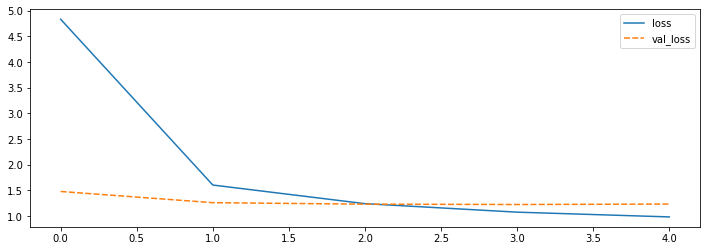

In [7]:
plt.figure(figsize=(12,4))
sns.lineplot(data=fit_history_es[["loss", "val_loss"]])

✔ Loss between train and valid sets got similar at the end  
✔ Process was stopped by early stopping callback in epoch 4 when the model started overfitting

<AxesSubplot:>

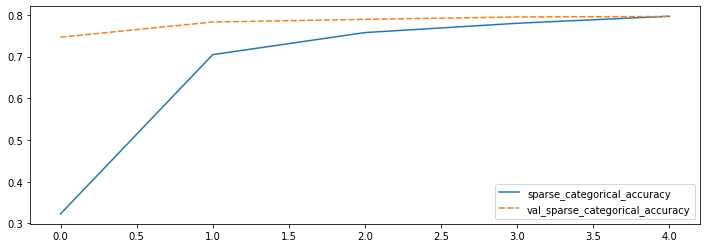

In [8]:
plt.figure(figsize=(12,4))
sns.lineplot(data=fit_history_es[["sparse_categorical_accuracy", "val_sparse_categorical_accuracy"]])

✔ Model got in a plateau of accuracy from epoch 4.  
✔ Performance for train and valid sets got similar at the end.

#### Portuguese model

In [9]:
fit_history_pt

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy,lr
0,4.868224,0.314112,1.501198,0.738900,0.001
1,1.690599,0.682888,1.294498,0.772412,0.001
2,1.349922,0.733899,1.279913,0.776913,0.001
3,1.302213,0.747799,1.240312,0.786192,0.001
4,1.122388,0.773299,1.254800,0.785291,0.001


✔ Learning rate remained constant along the epochs

<AxesSubplot:>

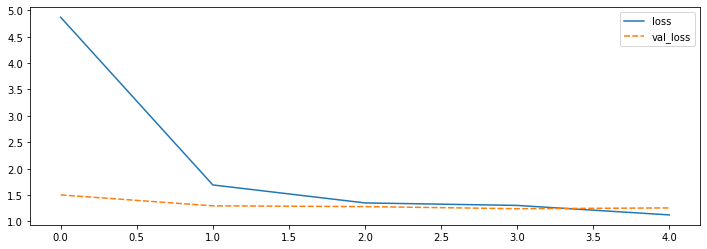

In [10]:
plt.figure(figsize=(12,4))
sns.lineplot(data=fit_history_pt[["loss", "val_loss"]])

✔ Similar to spanish model, ñoss between train and valid sets got similar at the end  
✔ Less impact of overfitting is observed here, but the callaback stopped process due to lack of improvement in validation set

<AxesSubplot:>

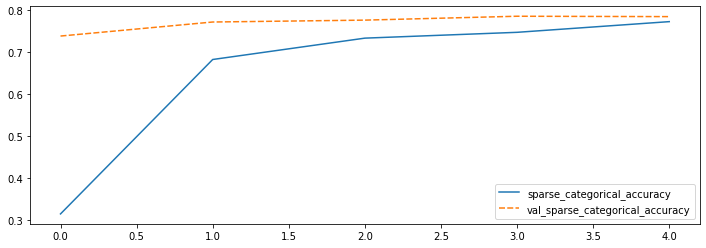

In [11]:
plt.figure(figsize=(12,4))
sns.lineplot(data=fit_history_pt[["sparse_categorical_accuracy", "val_sparse_categorical_accuracy"]])

✔ Similar behavior than spanish model, regarding same performance of train and valid sets on the last epoch.

### > Check results per model and dataset

Now let's evaluate the models in terms of a classification task to see the predictive performance obtained.

> The reason of the metrics chosen to evaluate the models is detailed in the document `docs/notes.md`.

#### Spanish model

In [12]:
results_es = get_df_results(all_results, language="es")
results_es

,dataset,accuracy,balanced_accuracy,f1_micro,loss
0,train,0.896294,0.843845,0.896294,0.520283
1,valid,0.796128,0.714955,0.796128,1.235851
2,test,0.794442,0.715198,0.794442,1.245578


✔ Some overfitting is observed in terms of having worse performance in valid & test sets compared with train set  
✔ Sets valid and test have similar performance, indicating that valid set was representative for the validation  
✔ Accuracy is good, even for balanced metric, indicating that most of the instances were correctly predicted  
✔ F1-Score is good (close to 0.8), which indicates a good balance between precision and recall and therefore a model that performs well with all the available classes   
✔ Next steps should try to mitigate overfitting as well as to increase the accuracy of predictions  

In [13]:
results_pt = get_df_results(all_results, language="pt")
results_pt

,dataset,accuracy,balanced_accuracy,f1_micro,loss
0,train,0.881918,0.846313,0.881918,0.579234
1,valid,0.785184,0.730824,0.785184,1.254792
2,test,0.786829,0.731182,0.786829,1.260613


✔ Same observations done for spanish model apply for this one 

> NOTE: missing validation of predictions overall data, but it is expected to be similar since there are balanced data regarding language

### Conclusions
- Models obtained have good performance for the classification task
- Next steps of the modeling should try to mitigate overfitting as well as to improve the accuracy of predictions.
- Next validation should be done with all the 20M rows, to see if the metrics change significantly.